In [ ]:
# Our Toolkit (Importing Libraries)
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
# Loading and Tidying Up the Data

print("--- Step 1: Loading the dataset ---")
try:
    # We'll load the data, assuming the first row contains the column names.
    df = pd.read_csv('../data/heart_disease.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Fatal Error: 'heart_disease.csv' could not be found. Please check the 'data' directory.")
    raise

# The original column names are long and contain spaces. Let's shorten them
# to simple, consistent names that are easy to type.
column_mapping = {
    'chest_pain_type': 'cp', 'resting_blood_pressure': 'trestbps',
    'cholestoral': 'chol', 'fasting_blood_sugar': 'fbs',
    'rest_ecg': 'restecg', 'Max_heart_rate': 'thalach',
    'exercise_induced_angina': 'exang', 'vessels_colored_by_flourosopy': 'ca',
    'thalassemia': 'thal'
}
df.rename(columns=column_mapping, inplace=True)
print("\n--- Step 2: Standardizing column names for easy access ---")
print("Our new, easy-to-use column names are:")
print(df.columns.tolist())

--- Step 1: Loading the dataset ---
Dataset loaded successfully!

--- Step 2: Standardizing column names for easy access ---
Our new, easy-to-use column names are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [10]:
# --- Cell 3: The Data Cleaning Deep Dive ---
# This is where we handle the messy parts. Real-world data is rarely perfect,
# so we need to convert text to numbers and handle special cases.

# CRITICAL FIX: The 'ca' column has a unique problem where numbers are spelled
# out as words (e.g., 'Zero', 'One'). We must manually convert these to numbers first.
print("\n--- Step 3a: Handling the special case in the 'ca' column ---")
number_word_map = { 'Zero': 0, 'One': 1, 'Two': 2, 'Three': 3 }

print("Original text values found in 'ca':", df['ca'].unique())
df['ca'] = df['ca'].map(number_word_map)
print("Converted numeric values in 'ca':", df['ca'].unique())

# Now, we'll handle the rest of the text and placeholders.
print("\n--- Step 3b: Converting all other text and placeholders to numbers ---")

# Replace the common '?' placeholder with NumPy's Not a Number (NaN)
df.replace('?', np.nan, inplace=True)

# Convert binary text columns ('Male'/'Female', etc.) to 1s and 0s
if 'sex' in df.columns:
    df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
if 'fbs' in df.columns:
    df['fbs'] = df['fbs'].map({'Greater than 120 mg/ml': 1, 'Lower than 120 mg/ml': 0})

# Convert any remaining text columns to numerical codes
for col in ['cp', 'restecg', 'exang', 'slope', 'thal']:
    if col in df.columns and df[col].dtype == 'object':
        df[col], _ = pd.factorize(df[col])

# Finally, ensure every column is a proper numeric type.
# 'errors=coerce' will turn any stubborn, non-numeric value into NaN.
df = df.apply(pd.to_numeric, errors='coerce')
print("\nAll columns have been converted to a numeric format.")
df.info()


--- Step 3a: Handling the special case in the 'ca' column ---
Original text values found in 'ca': ['Two' 'Zero' 'One' 'Three' 'Four']
Converted numeric values in 'ca': [ 2.  0.  1.  3. nan]

--- Step 3b: Converting all other text and placeholders to numbers ---

All columns have been converted to a numeric format.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1007 non-null   float64
 12  thal      1025 non-null  

In [11]:
# --- Cell 4: Filling in the Gaps (Imputation) ---
# Now that our data is numeric, we can easily find and fix any missing values (NaNs).

print("\n--- Step 4: Finding and filling missing values ---")
print("Missing values we need to fix:")
initial_nans = df.isnull().sum()
print(initial_nans[initial_nans > 0])

# We'll use the median to fill the gaps. The median is a good choice because
# it's resistant to being skewed by unusually high or low outlier values.
df.fillna(df.median(), inplace=True)
print("\nAfter filling, the number of remaining missing values is:", df.isnull().sum().sum())


--- Step 4: Finding and filling missing values ---
Missing values we need to fix:
ca    18
dtype: int64

After filling, the number of remaining missing values is: 0


In [12]:
# --- Cell 5: Preparing Our Goal (The Target Variable) ---
# Our goal is to predict a simple "yes" or "no" for heart disease.
# The original 'target' column has multiple levels (0-4). Let's simplify it:
# 0 = No Disease, 1 = Has Disease.
print("\n--- Step 5: Simplifying the target variable ---")
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
print("Our new target distribution:")
print(df['target'].value_counts())


--- Step 5: Simplifying the target variable ---
Our new target distribution:
target
1    526
0    499
Name: count, dtype: int64



--- Step 6: Generating visualizations to understand the data ---
Displaying histograms...


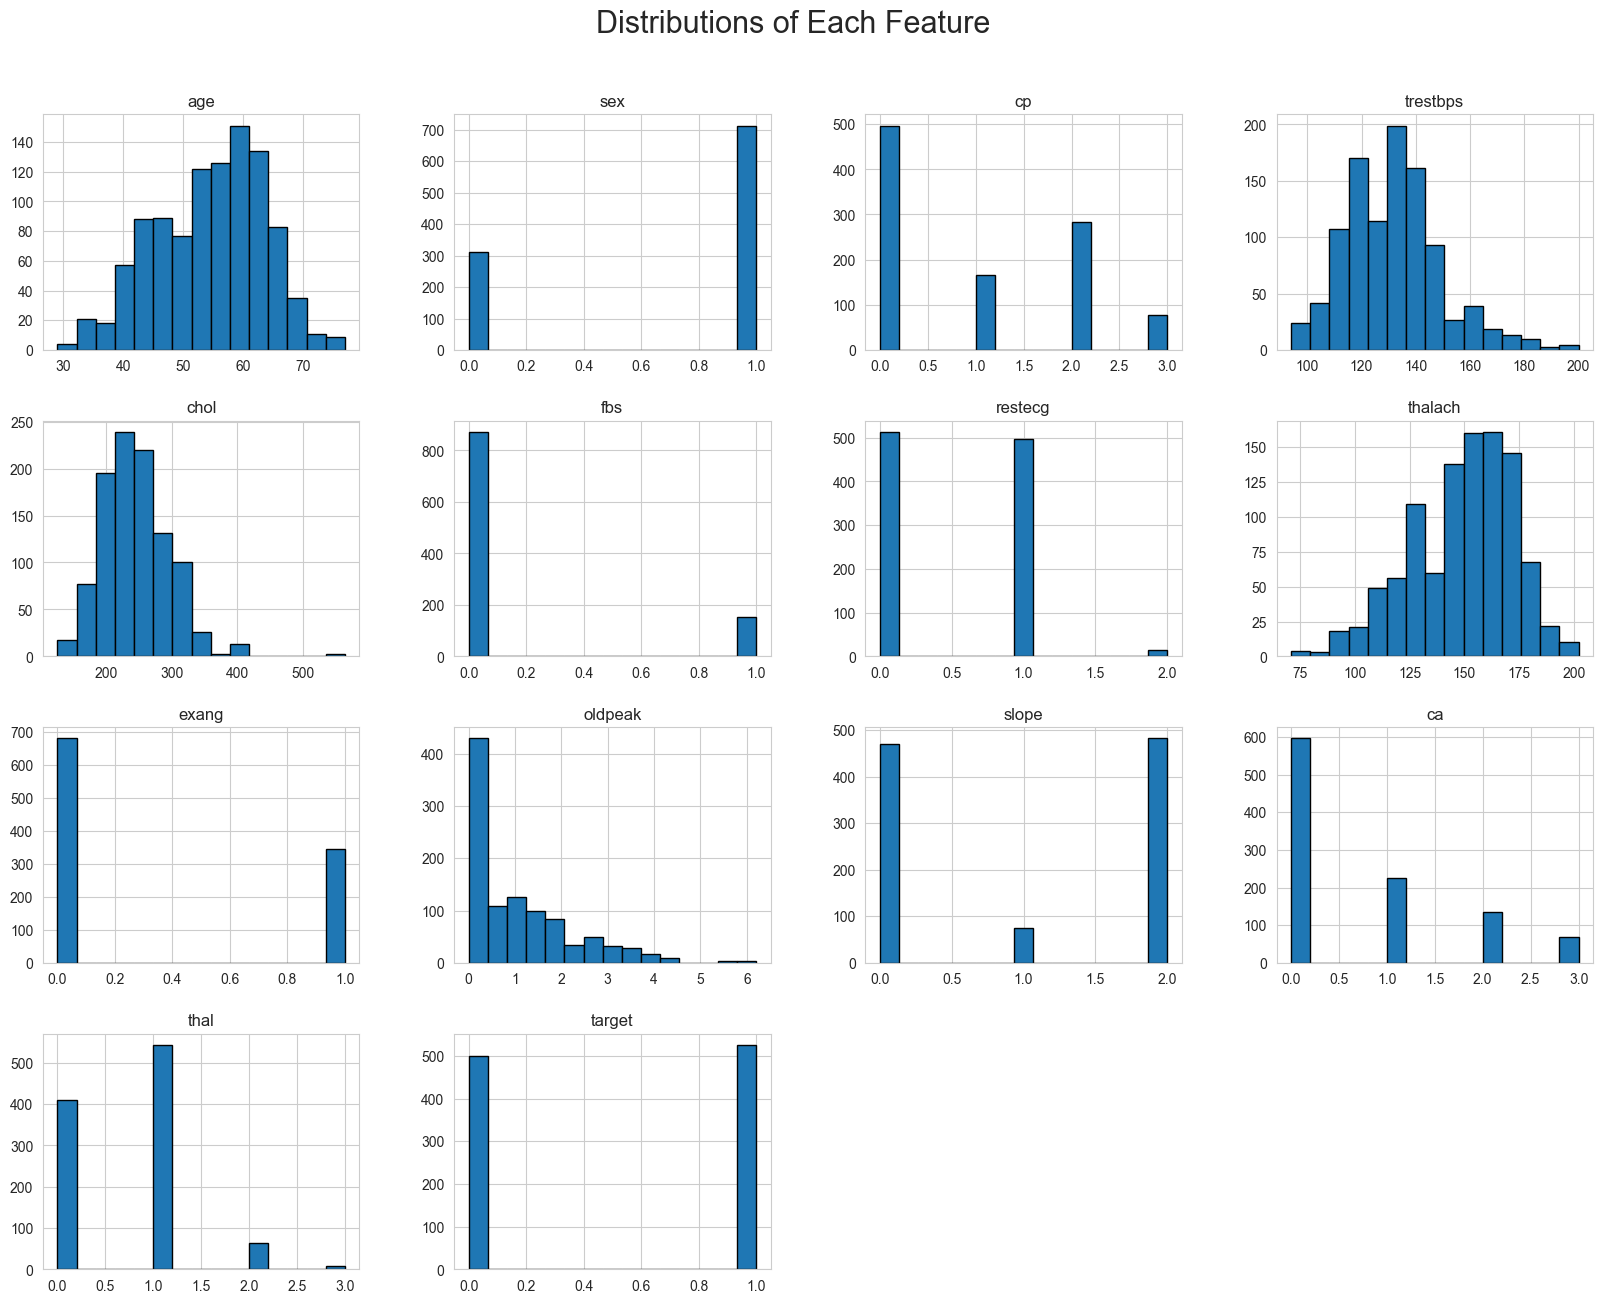


Displaying a correlation heatmap...


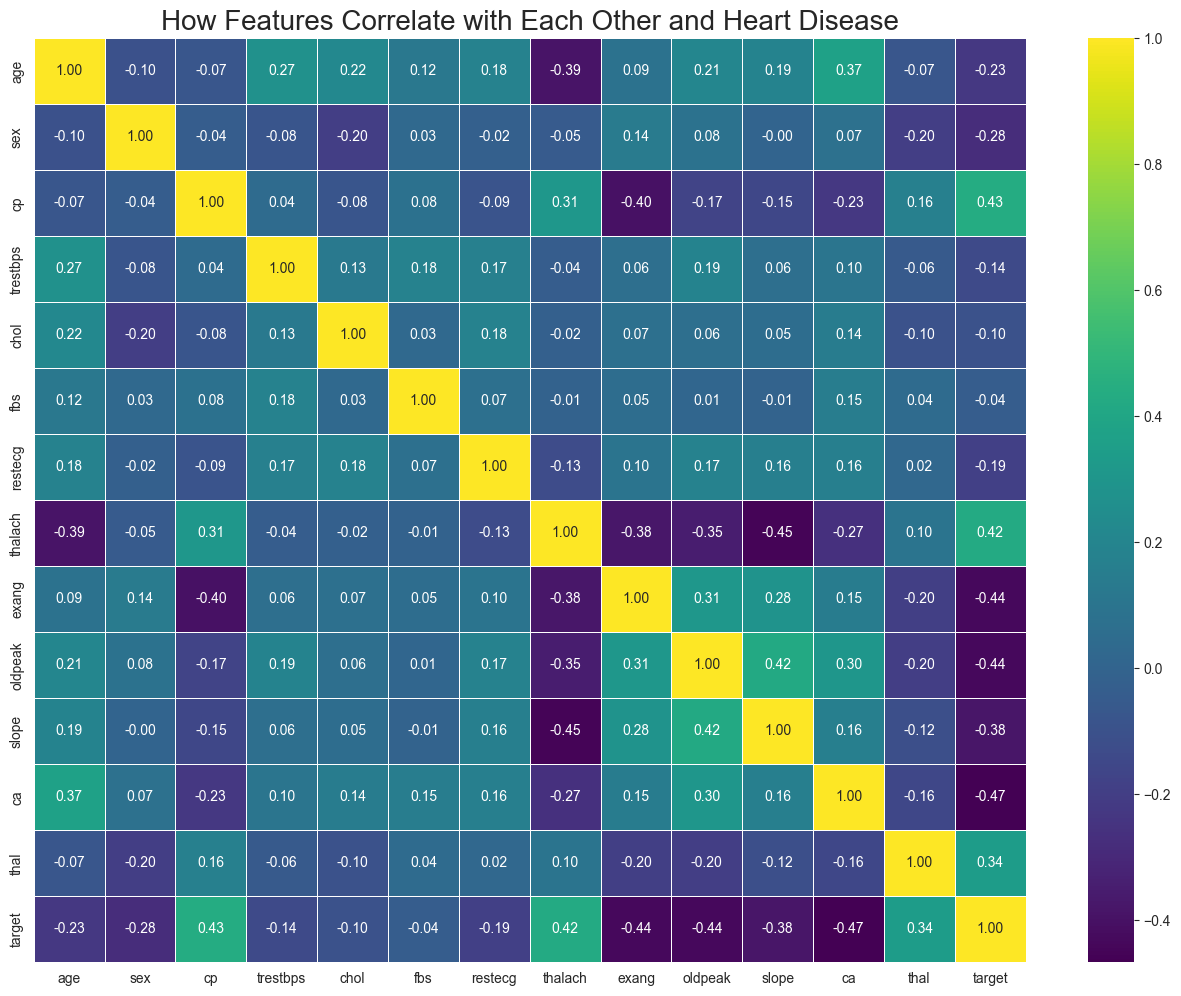

In [13]:
# --- Cell 6: Exploring the Data with Pictures (EDA) ---
# Now for the fun part! Let's create some graphs to understand our clean data.
# Visualizations can reveal patterns that numbers alone can't.

print("\n--- Step 6: Generating visualizations to understand the data ---")
sns.set_style('whitegrid')

# First, let's look at the distribution of each feature with histograms.
# This tells us the range and common values for each variable.
print("Displaying histograms...")
df.hist(figsize=(20, 15), bins=15, edgecolor='black')
plt.suptitle("Distributions of Each Feature", size=22, y=0.95)
plt.show()

# Next, a heatmap to see how features relate to each other.
# We're especially interested in which features have a strong color
# band in the 'target' row, as they are likely good predictors.
print("\nDisplaying a correlation heatmap...")
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("How Features Correlate with Each Other and Heart Disease", size=20)
plt.show()

In [14]:
# --- Cell 7: Saving Our Hard Work ---
# Our dataset is now clean, processed, and ready for machine learning!
# Let's save it to a new CSV file so we can easily use it in other notebooks.

print("\n--- Final Step: Saving the clean dataset ---")
df.to_csv('../data/heart_disease_cleaned.csv', index=False)
print("Cleaned data saved successfully to 'heart_disease_cleaned.csv'")
print("\nHere's a preview of the final, clean data:")
print(df.head())


--- Final Step: Saving the clean dataset ---
Cleaned data saved successfully to 'heart_disease_cleaned.csv'

Here's a preview of the final, clean data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        0      168      0      1.0      0   
1   53    1   0       140   203    1        1      155      1      3.1      1   
2   70    1   0       145   174    0        0      125      1      2.6      1   
3   61    1   0       148   203    0        0      161      0      0.0      0   
4   62    0   0       138   294    1        0      106      0      1.9      2   

    ca  thal  target  
0  2.0     0       0  
1  0.0     0       0  
2  0.0     0       0  
3  1.0     0       0  
4  3.0     1       0  
